In [420]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sweetviz as sv
from ydata_profiling import ProfileReport 

%matplotlib inline

In [422]:
df = pd.read_csv("final_data.csv")
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [424]:
average_values = df.groupby('team')['current_value'].sum().reset_index()

# Sort the results in descending order
average_values = average_values.sort_values(by='current_value', ascending=False)



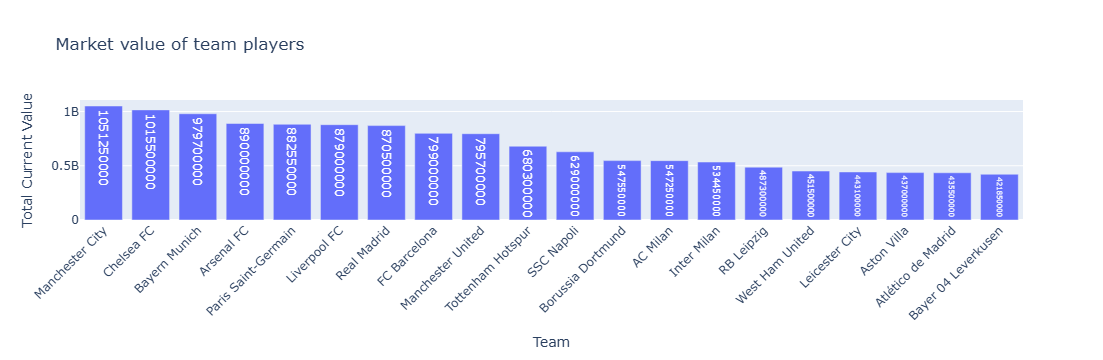

In [426]:
import plotly.express as px
fig = px.bar(average_values.head(20), 
             x='team', 
             y='current_value', 
             title='Market value of team players',
             labels={'current_value': 'Total Current Value', 'team': 'Team'},
             text='current_value')

# Update layout for better readability
fig.update_layout(xaxis_title='Team', 
                  yaxis_title='Total Current Value', 
                  xaxis_tickangle=-45)

# Show the plot
fig.show()

## Relevance

In [429]:
df.drop(columns='player', inplace=True)

In [431]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


## Uniquness 

In [434]:
df.duplicated().sum()

0

## Check Mising Value

In [437]:
df.isnull().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

## Handling the outliers

In [440]:
df.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


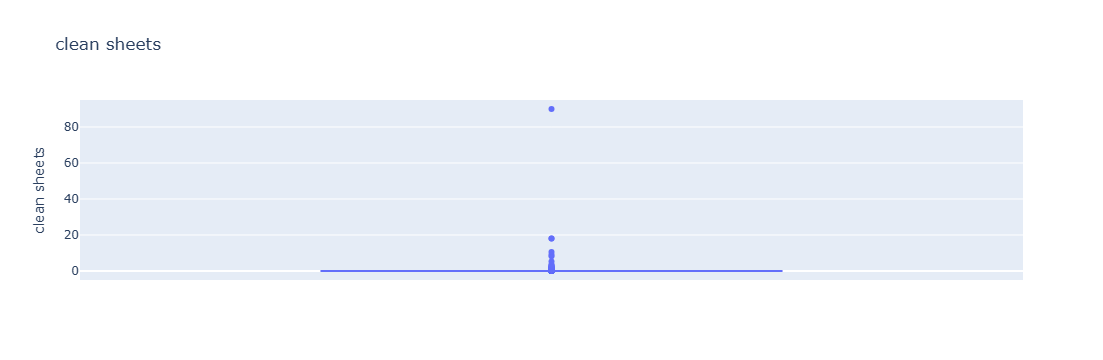

In [442]:
import plotly.express as px
fig = px.box(df, y='clean sheets', title='clean sheets')
# Show the plot
fig.show()

In [445]:
df = df[df['clean sheets'] < 1]

In [447]:
df_keeper = df[(df['clean sheets'] < 0.7 ) & (df['position'] == "Goalkeeper" )]

In [449]:
df_keeper

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.000000,32.0,104,0.0,0.0,0.009585,0.0,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.000000,30.0,15,0.0,0.0,0.069018,0.0,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
32,West Ham United,Alphonse Areola,Goalkeeper,195.000000,30.0,41,0.0,0.0,0.000000,0.0,...,0.898502,0.449251,3606,34,4,16,8000000,17500000,1,0
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.000000,38.0,75,0.0,0.0,0.040767,0.0,...,1.331723,0.271780,6623,554,99,4,1000000,9000000,1,0
54,Leicester City,Danny Ward,Goalkeeper,191.000000,29.0,33,0.0,0.0,0.000000,0.0,...,1.696970,0.242424,2970,127,29,2,8000000,10000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10698,Adelaide United,James Delianov,Goalkeeper,188.000000,23.0,6,0.0,0.0,0.000000,0.0,...,1.122661,0.374220,481,209,25,0,250000,350000,1,0
10699,Adelaide United,Ethan Cox,Goalkeeper,181.240353,19.0,0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0,0,0,0,50000,50000,1,0
10700,Adelaide United,Steven Hall,Goalkeeper,187.000000,18.0,3,0.0,0.0,0.000000,0.0,...,1.706161,0.426540,211,0,0,0,50000,50000,1,0
10727,Western Sydney Wanderers,Lawrence Thomas,Goalkeeper,191.000000,31.0,51,0.0,0.0,0.019608,0.0,...,1.431373,0.254902,4590,0,0,2,500000,1000000,1,0


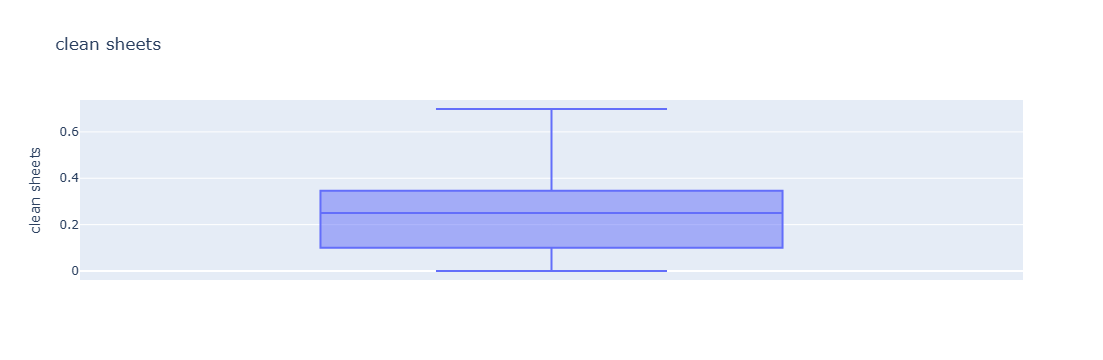

In [451]:
import plotly.express as px
fig = px.box(df_keeper, y='clean sheets', title='clean sheets')
# Show the plot
fig.show()

In [453]:
df = df[df['clean sheets'] < 0.7]

In [455]:
df.shape

(10708, 21)

In [458]:
df = df[df['goals'] < .85 ]

In [460]:
df = df[(df['current_value'] > 100000) & (df['current_value'] < 900000000)]

In [462]:
assist = df[df['assists'] < 1.5 ]

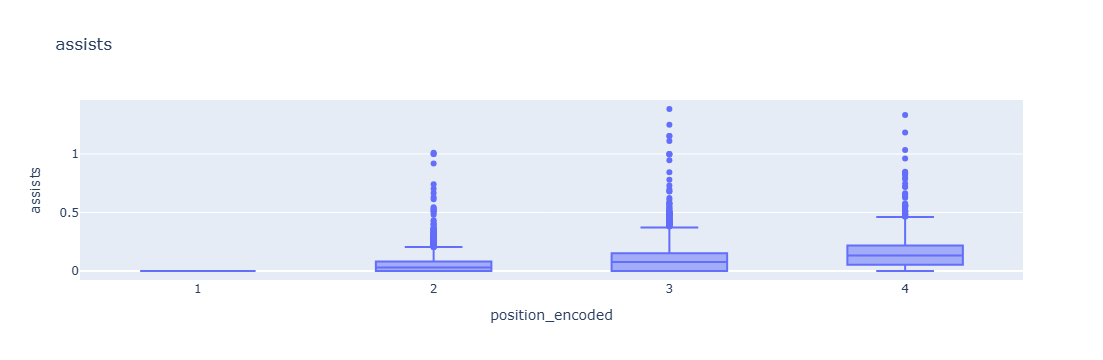

In [464]:
import plotly.express as px
fig = px.box(assist, x= 'position_encoded',y='assists', title='assists')
# Show the plot
fig.show()

In [466]:
df[(df['assists'] > 0.6 ) & (df['position_encoded'] == 4 )]

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
341,AFC Bournemouth,Junior Stanislas,Attack-LeftWinger,183.0,33.0,13,0.276923,0.830769,0.000000,0.0,...,0.0,0.0,325,756,79,1,700000,4500000,4,1
1150,Athletic Bilbao,Jon Morcillo,Attack-LeftWinger,183.0,24.0,28,0.264706,0.794118,0.529412,0.0,...,0.0,0.0,340,107,18,1,3000000,5000000,4,1
3169,Club Athletico Paranaense,Rômulo,Attack Centre-Forward,193.0,21.0,4,0.720000,0.720000,0.000000,0.0,...,0.0,0.0,125,21,6,0,2000000,2000000,4,0
3730,Sociedade Esportiva Palmeiras,Breno Lopes,Attack-LeftWinger,178.0,27.0,7,0.000000,0.833333,0.000000,0.0,...,0.0,0.0,108,60,24,5,2000000,2500000,4,1
4108,FC Arouca,Benji Michel,Attack-LeftWinger,178.0,25.0,13,0.318021,0.636042,0.000000,0.0,...,0.0,0.0,283,0,0,1,1500000,1500000,4,1
4240,FC Porto,Gabriel Veron,Attack-RightWinger,176.0,20.0,27,0.130814,0.654070,0.130814,0.0,...,0.0,0.0,688,163,48,7,12000000,25000000,4,1
4581,CF Monterrey,Joao Rojas,Attack-LeftWinger,179.0,25.0,9,0.000000,1.333333,0.000000,0.0,...,0.0,0.0,135,468,58,1,2000000,2000000,4,1
6358,SK Sturm Graz,Jakob Jantscher,Attack Centre-Forward,181.0,34.0,55,0.570825,0.625189,0.108728,0.0,...,0.0,0.0,3311,0,0,9,400000,4000000,4,0
6732,FC Cincinnati,Dominique Badji,Attack Centre-Forward,183.0,30.0,13,0.196507,0.786026,0.000000,0.0,...,0.0,0.0,458,111,15,0,600000,1250000,4,0
6869,D.C. United,Kristian Fletcher,Attack-LeftWinger,183.0,17.0,6,0.000000,2.903226,0.000000,0.0,...,0.0,0.0,31,0,0,0,1000000,1000000,4,1


In [468]:
df[(df['assists'] < 0.8 )].max()

team                             Ümraniyespor
name                             Úmaro Embaló
position               midfield-RightMidfield
height                                  206.0
age                                      42.0
appearance                                107
goals                                0.849057
assists                              0.794118
yellow cards                             30.0
second yellow cards                  0.927835
red cards                            6.923077
goals conceded                       3.941606
clean sheets                         0.698758
minutes played                           9510
days_injured                             2349
games_injured                             339
award                                      92
current_value                       150000000
highest_value                       180000000
position_encoded                            4
winger                                      1
dtype: object

In [470]:
df = df[df['assists'] < 0.6 ]

In [472]:
df.shape

(9253, 21)

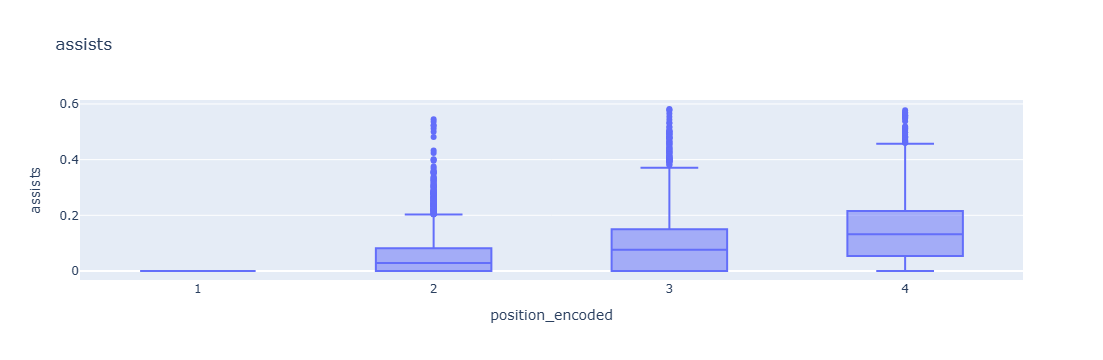

In [474]:
import plotly.express as px
fig = px.box(df, x= 'position_encoded',y='assists', title='assists')
# Show the plot
fig.show()

In [476]:
df = df[df['yellow cards'] < 1.25]

In [478]:
df = df[df['red cards'] < 0.1]

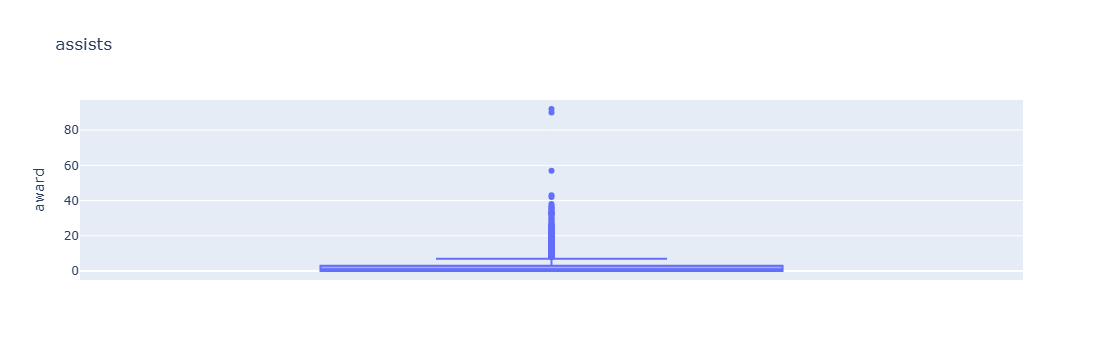

In [481]:
import plotly.express as px
fig = px.box(df, y= 'award', title='assists')
# Show the plot
fig.show()

In [483]:
df = df[df['award'] < 50 ]

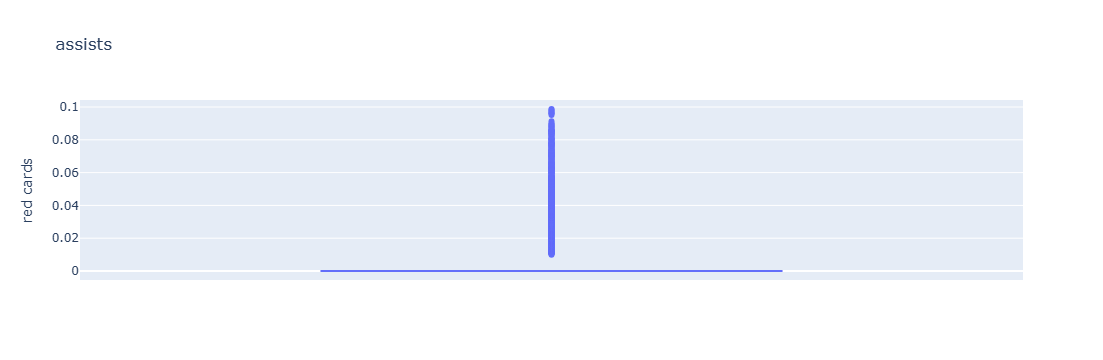

In [485]:
import plotly.express as px
fig = px.box(df, y='red cards', title='assists')
# Show the plot
fig.show()

In [486]:
df.shape

(9146, 21)

In [489]:
df.columns

Index(['team', 'name', 'position', 'height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

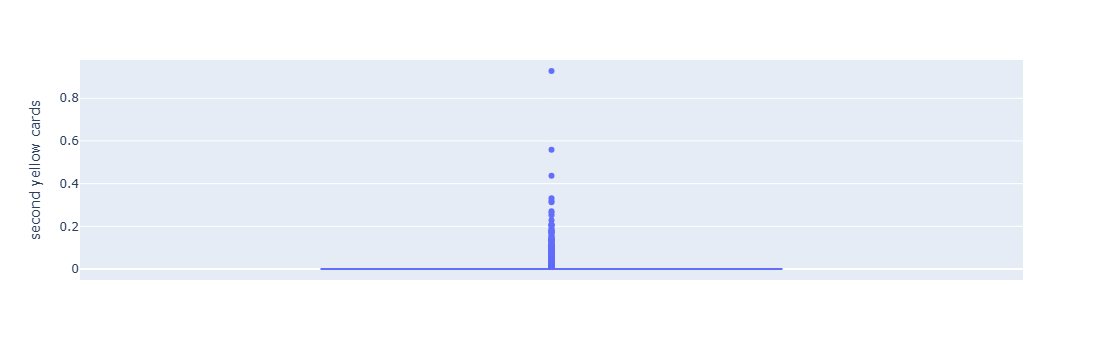

In [491]:
import plotly.express as px
fig = px.box(df, y='second yellow cards', title='')
# Show the plot
fig.show()

In [492]:
df.reset_index(inplace=True)

In [495]:
df.drop(columns='index', inplace=True)

In [497]:
df

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0000,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
3,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
4,Manchester United,Harry Maguire,Defender Centre-Back,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,...,0.000000,0.000000,4762,148,27,1,25000000,70000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9141,Western Sydney Wanderers,Brandon Borrello,Attack-RightWinger,178.0,27.0,45,0.359337,0.138206,0.248771,0.0000,...,0.000000,0.000000,3256,400,61,1,700000,1200000,4,1
9142,Western Sydney Wanderers,Amor Layouni,Attack-RightWinger,191.0,30.0,12,0.442804,0.332103,0.221402,0.0000,...,0.000000,0.000000,813,69,11,0,500000,1000000,4,1
9143,Western Sydney Wanderers,Yeni N'Gbakoto,Attack-RightWinger,173.0,31.0,35,0.291667,0.208333,0.125000,0.0000,...,0.000000,0.000000,2160,0,0,0,500000,3000000,4,1
9144,Western Sydney Wanderers,Jarrod Carluccio,Attack-RightWinger,178.0,22.0,32,0.226700,0.000000,0.283375,0.0000,...,0.000000,0.000000,1588,0,0,0,200000,200000,4,1


In [499]:
ft_eng = df.loc[:,['team','height','age','appearance','goals','assists','yellow cards', 'second yellow cards','clean sheets','games_injured','award','current_value',"highest_value",'position_encoded', 'winger']]

In [501]:
ft_eng

,team,height,age,appearance,goals,assists,yellow cards,second yellow cards,clean sheets,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,0.335463,5,13,15000000,70000000,1,0
1,Manchester United,196.0,30.0,15,0.000000,0.000000,0.069018,0.0000,0.207055,58,1,1500000,22000000,1,0
2,Manchester United,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.000000,22,9,50000000,50000000,2,0
3,Manchester United,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.000000,51,21,40000000,80000000,2,0
4,Manchester United,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.000000,27,1,25000000,70000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9141,Western Sydney Wanderers,178.0,27.0,45,0.359337,0.138206,0.248771,0.0000,0.000000,61,1,700000,1200000,4,1
9142,Western Sydney Wanderers,191.0,30.0,12,0.442804,0.332103,0.221402,0.0000,0.000000,11,0,500000,1000000,4,1
9143,Western Sydney Wanderers,173.0,31.0,35,0.291667,0.208333,0.125000,0.0000,0.000000,0,0,500000,3000000,4,1
9144,Western Sydney Wanderers,178.0,22.0,32,0.226700,0.000000,0.283375,0.0000,0.000000,0,0,200000,200000,4,1


In [503]:
corr1 = ft_eng.drop(['team'], axis=1)

In [505]:
corr1

,height,age,appearance,goals,assists,yellow cards,second yellow cards,clean sheets,games_injured,award,current_value,highest_value,position_encoded,winger
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0000,0.335463,5,13,15000000,70000000,1,0
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0000,0.207055,58,1,1500000,22000000,1,0
2,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.000000,22,9,50000000,50000000,2,0
3,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.000000,51,21,40000000,80000000,2,0
4,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.000000,27,1,25000000,70000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9141,178.0,27.0,45,0.359337,0.138206,0.248771,0.0000,0.000000,61,1,700000,1200000,4,1
9142,191.0,30.0,12,0.442804,0.332103,0.221402,0.0000,0.000000,11,0,500000,1000000,4,1
9143,173.0,31.0,35,0.291667,0.208333,0.125000,0.0000,0.000000,0,0,500000,3000000,4,1
9144,178.0,22.0,32,0.226700,0.000000,0.283375,0.0000,0.000000,0,0,200000,200000,4,1


## Feature Engineering

In [508]:
corr1 = corr1.corr()

<Axes: >

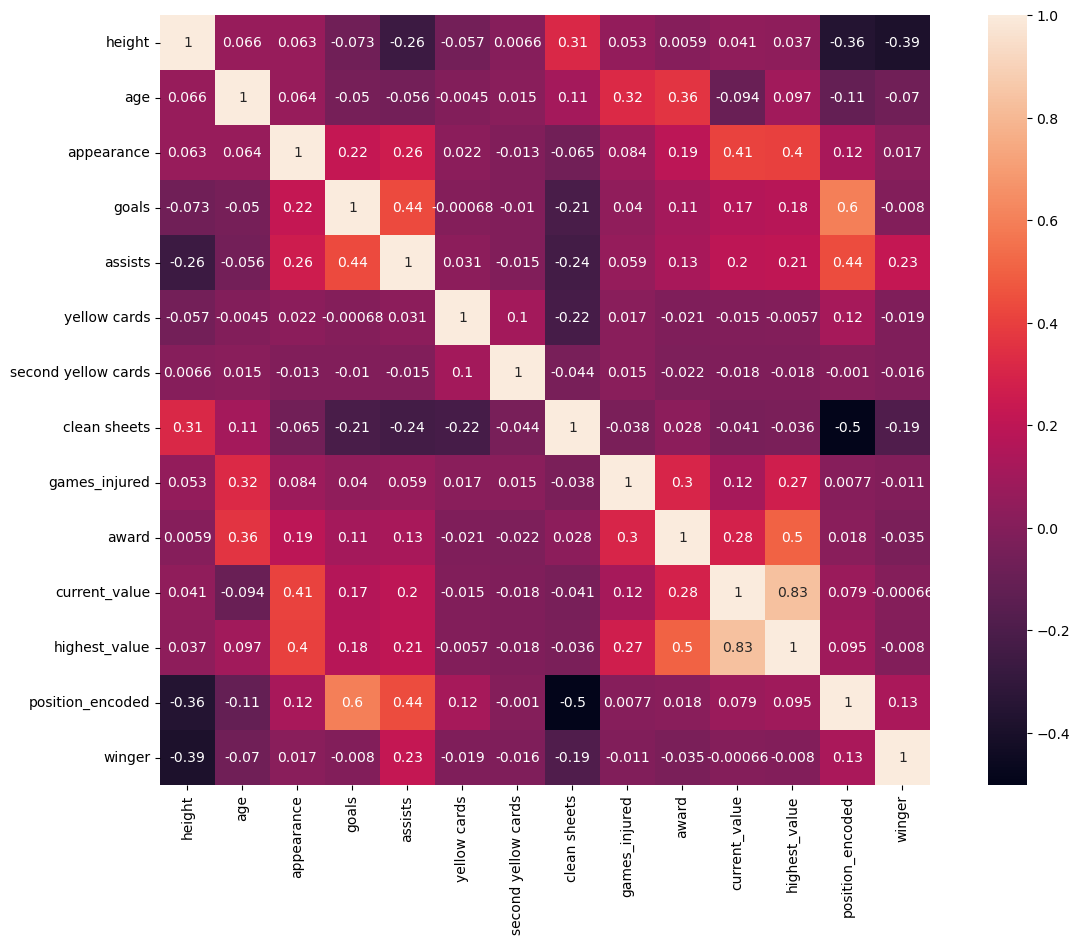

In [510]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,10)
sns.heatmap(corr1,square = True, annot = True)

## Bulding Model

In [513]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [515]:
encoding.shape

(9146, 9)

In [517]:
correlation = corr1.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000000
highest_value          0.949417
appearance             0.626100
award                  0.418434
assists                0.231380
goals                  0.180168
position_encoded       0.092569
games_injured          0.084282
height                -0.039906
winger                -0.069222
clean sheets          -0.148324
yellow cards          -0.173169
second yellow cards   -0.236890
age                   -0.255727
Name: current_value, dtype: float64


In [599]:
threshold = 0.15  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'award', 'current_value', 'highest_value'],
      dtype='object')

In [601]:
selected_features = ['age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'award', 'current_value', 'highest_value']

In [603]:
encoding = ft_eng[selected_features]

In [605]:
encoding

,age,appearance,goals,assists,yellow cards,second yellow cards,award,current_value,highest_value
0,32.0,104,0.000000,0.000000,0.009585,0.0000,13,15000000,70000000
1,30.0,15,0.000000,0.000000,0.069018,0.0000,1,1500000,22000000
2,25.0,82,0.028090,0.056180,0.224719,0.0000,9,50000000,50000000
3,30.0,63,0.017889,0.017889,0.053667,0.0000,21,40000000,80000000
4,30.0,68,0.037799,0.000000,0.302394,0.0189,1,25000000,70000000
...,...,...,...,...,...,...,...,...,...
9141,27.0,45,0.359337,0.138206,0.248771,0.0000,1,700000,1200000
9142,30.0,12,0.442804,0.332103,0.221402,0.0000,0,500000,1000000
9143,31.0,35,0.291667,0.208333,0.125000,0.0000,0,500000,3000000
9144,22.0,32,0.226700,0.000000,0.283375,0.0000,0,200000,200000


In [607]:
X = encoding.drop(['current_value'], axis=1)
y = encoding['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [609]:
X.shape

(9146, 8)

In [611]:
X_train

,age,appearance,goals,assists,yellow cards,second yellow cards,award,highest_value
2484,26.0,45,0.169598,0.169598,0.169598,0.000000,1,10000000
7971,27.0,65,0.275904,0.183936,0.202330,0.000000,1,30000000
5808,26.0,67,0.016167,0.000000,0.161667,0.000000,0,1500000
3944,23.0,50,0.000000,0.213169,0.298437,0.000000,2,1500000
2304,23.0,37,0.000000,0.184679,0.369357,0.000000,0,3000000
...,...,...,...,...,...,...,...,...
5734,31.0,56,0.037175,0.000000,0.092937,0.018587,1,1250000
5191,32.0,21,0.155889,0.051963,0.103926,0.000000,1,5000000
5390,25.0,25,0.114213,0.114213,0.228426,0.000000,2,10000000
860,34.0,2,0.000000,0.000000,0.000000,0.000000,2,750000


In [531]:
X_train.shape

(7316, 8)

In [533]:
model = LinearRegression()


In [535]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [537]:
y_pred = model.predict(X_test_scaled)

In [539]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,-1.368624e+06
appearance,9.402575e+05
goals,-4.580144e+04
assists,5.832863e+04
yellow cards,-1.520391e+05
second yellow cards,1.183003e+04
award,-1.049782e+06
highest_value,7.937441e+06


In [541]:
print(model.intercept_) 

4114034.308365226


In [543]:
y_base = [y_train.mean()] * len(y_test)

In [545]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 93539451834076.44


In [547]:
mse_train = mean_squared_error(y_train, model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 23252069326341.582
Mean Squared Error for testing: 21670471510015.49


### Training and Testing Model Accuracy

In [550]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {round(r2_score_train,3)}')
print(f'R Square for testing: {round(r2_score_test,3)}')

R Square for training: 0.73
R Square for testing: 0.768


In [552]:
predictions = model.predict(X_test_scaled)

In [554]:
Real_Values = np.array(y_test)

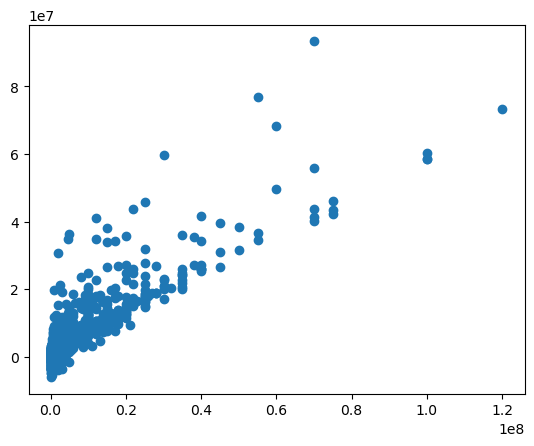

In [556]:
plt.scatter(Real_Values,predictions); 

C:\Users\User\AppData\Local\Temp\ipykernel_16120\3949530067.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




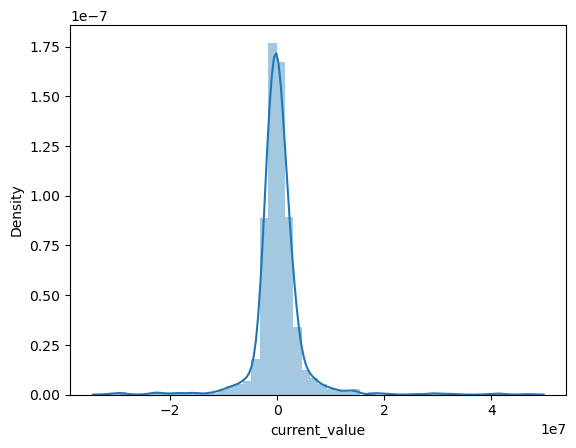

In [558]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

## Use GridSearch

In [643]:
model = LinearRegression()

In [645]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

In [647]:
param_grid = {
    'fit_intercept': [True, False],
     'positive': [True,False]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           #cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)



In [657]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [659]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'fit_intercept': True, 'positive': False}


In [661]:
y_pred = best_model.predict(X_test_scaled)

In [663]:
coeff_df_best = pd.DataFrame(best_model.coef_,X.columns,columns=['Coefficient'])
coeff_df_best

,Coefficient
age,-3.038076e+05
appearance,3.653838e+04
goals,-2.821579e+05
assists,5.666815e+05
yellow cards,-1.033686e+06
second yellow cards,5.344442e+05
award,-2.992536e+05
highest_value,5.781858e-01


In [665]:
print(best_model.intercept_) 

7406446.360205474


In [667]:
y_base = [y_train.mean()] * len(y_test)

In [669]:
# our benchmark model
mse_base = mean_squared_error(y_test, y_base )
print(f'Mean Squared Error of base model: {mse_base}')

Mean Squared Error of base model: 93539451834076.44


In [671]:
mse_train = mean_squared_error(y_train, best_model.predict(X_train_scaled))
mse_test = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for training: {mse_train}')
print(f'Mean Squared Error for testing: {mse_test}')

Mean Squared Error for training: 97929772319773.77
Mean Squared Error for testing: 104111345814411.88


In [673]:
# our benchmark model
mse_base = mean_absolute_error(y_test, y_base )
print(f'Mean Absolute  Error of base model: {mse_base}')

Mean Absolute  Error of base model: 4896877.362140618


In [675]:
mae_train = mean_absolute_error(y_train, best_model.predict(X_train_scaled))
mae_test = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error for training: {mae_train}')
print(f'Mean Absolute Error for testing: {mae_test}')

Mean Absolute Error for training: 6942634.973794561
Mean Absolute Error for testing: 7028575.003718865


In [677]:
# our benchmark model
print(f'Root Mean Squared  Error of base model: {np.sqrt(mse_base)}')

Root Mean Squared  Error of base model: 2212.888917713815


In [679]:
print(f'Root Mean Squared Error for training: {np.sqrt(mse_train)}')
print(f'Root Mean Squared Error for testing: {np.sqrt(mse_test)}')

Root Mean Squared Error for training: 9895947.267430933
Root Mean Squared Error for testing: 10203496.744470097


In [681]:
r2_score_train = r2_score(y_train, best_model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: -0.13868632903478217
R Square for testing: -0.11350572893243127
